In [45]:
import pandas as pd
import numpy as np
from datetime import datetime, date

In [46]:
sectors = ['SPY', 'QQQ', 'GLD', 'XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
volatility = ['VIXY', 'VIXM', 'SVOL'] #SHORTVOL and LONGVOL?
sectors = sectors + volatility

In [47]:
df_list= [pd.read_csv('data/' + sector + '.csv') for sector in sectors]
df_sector_vwap = pd.DataFrame([df_list[i]['vwap'] for i in range(len(df_list))])
df_sector_vwap = df_sector_vwap.T
df_sector_vwap.columns = sectors

df_sector_vwap.index = pd.to_datetime(df_list[0]['timestamp'], unit='ms')
df_sector_vwap.index = pd.to_datetime(df_sector_vwap.index.date)

In [48]:
today = str(datetime.now())
SPY_today = 474.84
QQQ_today = 409.16
VIXY_today = 15.5
VIXM_today = 16.2

current_value = { 'SPY' : {today : SPY_today}, 'QQQ' : {today : QQQ_today}, 'VIXY' : {today : VIXY_today}, 'VIXM' : {today : VIXM_today}}

index_vwap = df_sector_vwap[['SPY', 'QQQ', 'VIXY', 'VIXM']]
index_vwap = pd.concat([index_vwap, pd.DataFrame(current_value)])
index_vwap.index = pd.to_datetime(index_vwap.index)
index_vwap.index = index_vwap.index.date
index_vwap

,SPY,QQQ,VIXY,VIXM
2022-03-04,430.9209,337.6236,108.8525,33.8278
2022-03-07,423.9601,330.3723,111.3775,34.2390
2022-03-08,419.7630,325.4225,115.0300,34.8799
2022-03-09,426.1810,332.8806,108.9580,34.1098
2022-03-10,423.8766,330.0344,109.5435,34.9250
...,...,...,...,...
2023-12-29,475.3637,409.5742,15.5657,16.7055
2024-01-02,472.5097,403.0779,15.7794,16.8505
2024-01-03,469.8983,399.5046,15.9084,16.8864
2024-01-04,468.5539,397.5516,15.9398,16.8318


In [49]:
import talib as ta
import matplotlib.pyplot as plt

In [50]:
sector_ema = pd.DataFrame()
index_ema_today = pd.DataFrame()
sector_sma = pd.DataFrame()
index_sma_today = pd.DataFrame()
bbands = pd.DataFrame()

In [51]:
for col in df_sector_vwap.columns:
    sector_ema[col] = ta.EMA(df_sector_vwap[col], timeperiod=20)
    sector_sma[col] = ta.SMA(df_sector_vwap[col], timeperiod=20)

for col in index_vwap.columns:
    index_ema_today[col] = ta.EMA(index_vwap[col], timeperiod=20)
    index_sma_today[col] = ta.SMA(index_vwap[col], timeperiod=20)

for col in df_sector_vwap.columns:
    bbands[col + 'upper'], bbands[col + 'mid'], bbands[col + 'lower'] = ta.BBANDS(df_sector_vwap[col], timeperiod=50, nbdevup=2, nbdevdn=2, matype=0)

In [52]:
sector_df = pd.DataFrame()
index_df_today = pd.DataFrame()

In [53]:
sector_diff = ((sector_ema - sector_sma)/sector_sma) * 10000
index_diff_today = ((index_ema_today - index_sma_today)/index_sma_today) * 10000

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,14.164474,40.083175,7.236848,58.511597,18.079391,-6.644071,58.988865,-6.600370,2.616534,5.740998,15.421937,-9.820091,12.714864,-48.901009,133.040636,82.267194,-7.905085
2023-12-29,10.109941,33.593503,14.393127,53.614107,2.657433,-5.463685,57.156039,-9.316829,0.918540,-3.289870,13.539402,-17.973175,8.391264,-52.477522,120.209568,78.130419,-12.176785
2024-01-02,4.552591,18.812277,26.448841,44.345753,-13.123136,3.111408,65.706495,-9.961852,8.281172,-9.634632,14.392191,-19.897710,-6.796707,-45.404194,110.622140,75.463588,-16.690454
2024-01-03,-6.261778,-4.456067,23.717199,29.916774,-36.093843,10.164136,74.390993,-13.743315,15.184968,-22.201908,5.666704,-27.297922,-32.312567,-36.032439,120.488682,80.334514,-22.266181


In [54]:
sector_diff = sector_diff.dropna()
index_diff_today = index_diff_today.dropna()

sector_diff

,SPY,QQQ,GLD,XLC,XLY,XLP,XLE,XLF,XLV,XLI,XLB,XLRE,XLK,XLU,VIXY,VIXM,SVOL
2022-03-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2022-04-01,5.572001,11.506680,-3.547159,8.555102,5.466851,23.186483,-1.475397,-11.955644,4.376497,-3.297419,4.208034,15.184017,8.195967,11.241784,-4.903357,-10.436161,-3.359677
2022-04-04,3.971740,16.180641,1.665049,16.184369,-0.894037,38.400643,6.802165,-36.920643,0.756117,-12.770248,-3.133677,25.742552,11.479606,26.497120,-0.606946,-13.842352,-7.526474
2022-04-05,-7.525459,3.611569,21.454995,13.416048,-19.979721,45.526211,27.133667,-65.184058,-9.585248,-30.377548,-18.164347,33.041294,-3.028742,42.869804,49.222868,5.499433,-19.007399
2022-04-06,-21.453445,-14.921821,28.210613,6.591045,-48.205068,50.551491,26.767818,-84.845891,-14.752482,-49.421513,-35.103532,42.381311,-20.107042,54.112415,115.709812,26.820141,-36.979006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-28,14.164474,40.083175,7.236848,58.511597,18.079391,-6.644071,58.988865,-6.600370,2.616534,5.740998,15.421937,-9.820091,12.714864,-48.901009,133.040636,82.267194,-7.905085
2023-12-29,10.109941,33.593503,14.393127,53.614107,2.657433,-5.463685,57.156039,-9.316829,0.918540,-3.289870,13.539402,-17.973175,8.391264,-52.477522,120.209568,78.130419,-12.176785
2024-01-02,4.552591,18.812277,26.448841,44.345753,-13.123136,3.111408,65.706495,-9.961852,8.281172,-9.634632,14.392191,-19.897710,-6.796707,-45.404194,110.622140,75.463588,-16.690454
2024-01-03,-6.261778,-4.456067,23.717199,29.916774,-36.093843,10.164136,74.390993,-13.743315,15.184968,-22.201908,5.666704,-27.297922,-32.312567,-36.032439,120.488682,80.334514,-22.266181


In [55]:
sector_diff.info()
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 443 entries, 2022-03-31 to 2024-01-04
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     443 non-null    float64
 1   QQQ     443 non-null    float64
 2   GLD     443 non-null    float64
 3   XLC     443 non-null    float64
 4   XLY     443 non-null    float64
 5   XLP     443 non-null    float64
 6   XLE     443 non-null    float64
 7   XLF     443 non-null    float64
 8   XLV     443 non-null    float64
 9   XLI     443 non-null    float64
 10  XLB     443 non-null    float64
 11  XLRE    443 non-null    float64
 12  XLK     443 non-null    float64
 13  XLU     443 non-null    float64
 14  VIXY    443 non-null    float64
 15  VIXM    443 non-null    float64
 16  SVOL    443 non-null    float64
dtypes: float64(17)
memory usage: 62.3 KB
<class 'pandas.core.frame.DataFrame'>
Index: 444 entries, 2022-03-31 to 2024-01-06
Data columns (total 4 columns):
 #   Column  Non

In [56]:
#Rate of change of the sector_diff

sector_diff_delta = pd.DataFrame()
sector_diff_delta['delta'] = (sector_diff.iloc[-1] - sector_diff.iloc[-3]) / abs(sector_diff.iloc[-3])
#sector_diff_delta['delta2'] = sector_diff.apply(ta.ROCP, timeperiod=2)
sector_diff_delta_disp = sector_diff_delta.sort_values('delta', axis=0, ascending=False)

index_diff_delta = pd.DataFrame()
index_diff_delta['delta'] = (index_diff_today.iloc[-1] - index_diff_today.iloc[-3]) / abs(index_diff_today.iloc[-3])
#index_diff_delta['delta2'] = index_diff_delta.apply(ta.ROCP, timeperiod=2)
index_diff_delta_disp = index_diff_delta.sort_values('delta', axis=0, ascending=False)

print(sector_diff_delta_disp)
print(index_diff_delta_disp)
#sector_diff_delta['delta_func'] = ta.ROCR100(sector_diff.values, timeperiod=3)



         delta
XLP   2.641187
XLV   1.446903
XLU   0.316767
VIXY  0.143492
XLE   0.135556
VIXM  0.104601
GLD  -0.263151
SVOL -0.622132
XLC  -0.719083
XLF  -0.841845
XLRE -0.977418
XLB  -1.776524
QQQ  -2.474815
XLI  -2.778785
XLY  -3.544818
SPY  -5.078977
XLK  -7.186390
         delta
VIXY -0.018966
VIXM -0.124974
SPY  -2.999567
QQQ  -7.229741


In [57]:
sector_diff_delta = sector_diff.pct_change(2)
index_diff_today_delta = index_diff_today.pct_change(2)
sector_diff_accel = sector_diff_delta.pct_change(2)
index_diff_today_accel = index_diff_today_delta.pct_change(2)

In [58]:
#How to concat the last row of each df ---

sector_snapshot = pd.concat([sector_diff.iloc[-1], sector_diff_delta.iloc[-1], sector_diff_accel.iloc[-1]], axis=1)
sector_snapshot.columns = ['diff', 'delta', 'accel']
sector_snapshot

index_snapshot = pd.concat([index_diff_today.iloc[-1], index_diff_today_delta.iloc[-1], index_diff_today_accel.iloc[-1]], axis=1)
index_snapshot.columns = ['diff', 'delta', 'accel']
index_snapshot

,diff,delta,accel
SPY,-25.044400,2.999567,-2.852306
QQQ,-36.672278,7.229741,-7.383050
VIXY,118.203510,-0.018966,-9.168264
VIXM,70.294776,-0.124974,-5.430065


How do we get the value that would keep the security above

In [110]:
sector_diff_sorted = sector_diff.iloc[-1].T.sort_values(axis=0, ascending=False)
index_diff_sorted = index_diff_today.iloc[-1].T.sort_values(axis=0, ascending=False)

print(sector_diff_sorted)
print(index_diff_sorted)

sector_diff_delta_disp.assign(diff = sector_diff_sorted).sort_values('diff', axis=0, ascending=False)

VIXY    122.402391
VIXM     38.938532
XLRE     38.885759
XLI      27.051173
XLY      21.354831
XLV      14.494066
XLF       8.957625
XLB       6.216224
XLP       1.150796
SVOL      0.255590
XLU      -0.645629
QQQ      -4.130253
XLE      -4.375309
SPY      -5.587694
XLK     -19.138994
GLD     -32.109309
XLC     -34.764956
Name: 2023-12-18 00:00:00, dtype: float64
QQQ    11.297770
SPY     3.837082
Name: 2023-12-19, dtype: float64


,delta,diff
VIXY,0.040936,122.402391
VIXM,-0.205112,38.938532
XLRE,0.488708,38.885759
XLI,0.706076,27.051173
XLY,15.180836,21.354831
XLV,-0.415006,14.494066
XLF,56.910128,8.957625
XLB,1.729752,6.216224
XLP,-0.651109,1.150796
SVOL,1.020686,0.255590


In [111]:
index_diff_today.info()

<class 'pandas.core.frame.DataFrame'>
Index: 433 entries, 2022-03-31 to 2023-12-19
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SPY     433 non-null    float64
 1   QQQ     433 non-null    float64
dtypes: float64(2)
memory usage: 10.1+ KB


In [112]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [113]:
px.line(data_frame=sector_diff).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [114]:
px.line(data_frame=df_sector_vwap['SPY'].loc['2022-02-15 04:00:00':])

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [115]:
fig = go.Figure(
    make_subplots(rows=3, cols=1, shared_xaxes='all')
)
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index), row=1, col=1)

In [116]:
df = pd.read_csv('data/QQQ.csv', parse_dates=['timestamp'], index_col=['timestamp'])
df.index = pd.to_datetime(df.index, unit='ms')
#fig.add_trace(name='raw', x=)
fig.add_hline(0)
fig.add_trace(go.Scatter(x=df.index, y=df['vwap']), row=2, col=1)
fig.add_trace(go.Scatter(x=sector_diff.index, y=sector_diff['QQQ']), row=3, col=1)
fig.show()

C:\Users\quack\AppData\Local\Temp\ipykernel_20660\3875102436.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



In [117]:
import scipy.stats as stats

In [118]:
zscore = lambda x: (x[-1] - x.mean()) / x.std()
sector_diff_z = sector_diff.rolling(30).apply(zscore).rolling(5).mean()

C:\Users\quack\AppData\Local\Temp\ipykernel_20660\716367803.py:1: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [119]:
px.line(data_frame=sector_diff_z['2022-03-04':][['SPY', 'QQQ']]).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [120]:
sectors = ['XLC', 'XLY', 'XLP', 'XLE', 'XLF', 'XLV', 'XLI', 'XLB', 'XLRE', 'XLK', 'XLU']
condensed_df = pd.DataFrame()
condensed_df['volatility'] = (sector_diff['VIXY'] + sector_diff['VIXM']) / 2
condensed_df['sector_avg'] = sum([sector_diff[sector] for sector in sectors]) / len(sectors)
condensed_df['long_bonds'] = sector_diff['TLT']
condensed_df['metals'] = sector_diff['GLD']

KeyError: 'TLT'

In [ ]:
px.line(data_frame=condensed_df).add_hline(0)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [ ]:
import seaborn as sns

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

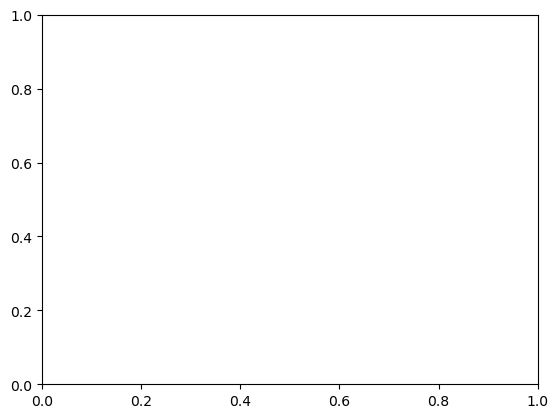

In [ ]:
sns.kdeplot(data=condensed_df)

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\quack\anaconda3\envs\stand\lib\site-packages\seaborn\_core.py:1225: FutureWarning:

is_categorical_dtype is deprecated 

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

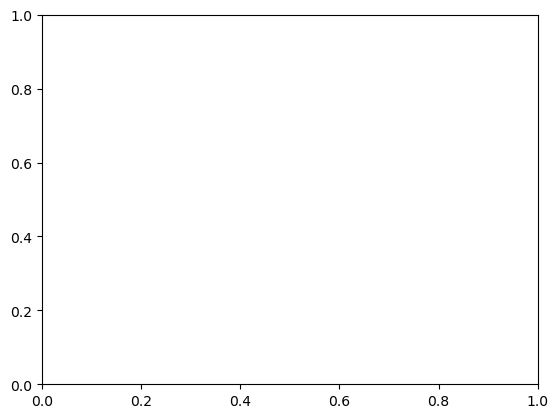

In [ ]:
sns.kdeplot(data=sector_diff)

In [ ]:
#Divide by abs of z score?

In [ ]:
fig = go.Figure()
for sector in sectors:
    fig.add_trace(go.Scatter(name=sector, y=sector_diff[sector], x=sector_diff.index))